#### 훈련 세트와 테스트 세트 만들기 #1

- 도미와 빙어 데이터를 2차원 리스트로 변경</br>
    • 총 49마리의 데이터: 도미 35마리, 빙어 14마리</br>
    • zip() 함수 사용

In [19]:
# 데이터 생성
# • 길이와 무게를 합친 2차원 리스트 생성: fish_data
# • 결과 확인을 위한 리스트 생성: fish_target

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 
31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 
11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] # 2차원 리스트[길이, 무게]

fish_target = [1] * 35 + [0]*14 # target 값 생성

#### 훈련 세트와 테스트 세트 만들기 #2

• fish_data, fish_target 리스트를 훈련 세트와 테스트 세트로 분리</br>
    - 훈련 세트: 35개, 테스트 세트: 14개로 분리

In [20]:
#	훈련 세트 생성(35개)
train_input =	fish_data[:35]	# 0 ~ 34
train_target =	fish_target[:35]

#	테스트 세트 생성(14개)
test_input =	fish_data[35:] # 35 ~ 끝까지
test_target =	fish_target[35:]

#### 테스트 세트로 평가하기
- k-최근접 알고리즘 모델 생성 및 평가하기</br>
    • 훈련 세트로 모델을 훈련</br>
    • 테스트 세트로 정확도 평가

In [21]:
from cgi import test
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier() # 객체 생성
kn = kn.fit(train_input, train_target) # 모델 훈련
kn.score(test_input, test_target) # 테스트 세트로 평가(정확도 출력)

# • 잘못된 훈련 데이터 사용 결과 => 정확도 0.0
#  도미 데이터로만 훈련했기 때문에(샘플링 편향)

0.0

### Numpy를 활용한 배열 생성
- Numpy 사용</br>
    - 다차원 배열을 쉽게 조작할 수 있음

In [22]:
# 기존 fish_data와 fish_target를 Numpy 배열로 변경
# • Numpy.array(list):	파이썬의 list를 Numpy의 array로 변경
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)
print(input_arr.shape) #	shape:	배열의 크기 리턴

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


### Numpy를 이용하여 데이터 섞기
- Numpy 사용</br>
    • random.seed(seed) : 랜덤값 생성을 위한 초기값 지정
    - 초기값(seed)값이 같으면 동일한 랜덤값을 뽑을 수 있음</br>

    • Numpy.arange(stop):	stop-1까지 1의 간격으로 배열 생성</br> 
    - arange: array range</br>
        
    • random.shuffle(x):	배열 x(ndarray 타입)를 무작위로 섞음

In [23]:
import numpy as np
np.random.seed(42)
index_list = np.arange(49) # 0~48까지 값을 가지는 배열 생성
print(index_list)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [24]:
np.random.shuffle(index_list) # 배열 내용을 무작위로 섞음
print(index_list)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


#### 랜덤 배열로 훈련 세트와 테스트 세트 만들기
- Numpy의 배열 인덱싱 이용</br>
    • 여러 개의 인덱스로 한 번에 여러 개의 배열 원소를 선택할 수 있음

In [25]:
#	훈련 세트 생성
train_input =	input_arr[index_list[:35]] # 랜덤하게 섞인 배열을 인덱스로 사용
train_target =	target_arr[index_list[:35]]

#	테스트 세트 생성
test_input =	input_arr[index_list[35:]]
test_target =	target_arr[index_list[35:]]
# 총 4개의 배열 생성

### 무작위로 섞인 데이터 확인하기

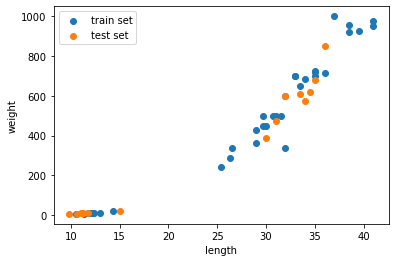

In [26]:
# 훈련 데이터와 테스트 데이터 다시 확인
import matplotlib.pyplot as plt
#	[:,	0]:	모든 행에서 0번째 length,	[:,	1]:	모든 행에서 1번째 weight
plt.scatter(train_input[:, 0], train_input[:, 1], label = "train set")
plt.scatter(test_input[:, 0], test_input[:, 1], label = "test set")

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### 두 번째 머신러닝 프로그램
- 무작위로 섞인 훈련 세트와 테스트 세트를 이용하여 k-최근접 이웃모델 생성 및 훈련
-  fit()	->	score()	->	predict() 호출

In [27]:
kn = kn.fit(train_input, train_target)
print("score : ", kn.score(test_input, test_target))

print("predict:					",	kn.predict(test_input))
print("test_target:	",	test_target)	#	predict 결과값과 비교를 위해 출력
# predict와 test_target 완전 일치 : 100% 정확도
# [0, ...0] : Numpy 배열 scikit-learn 모델의 입출력값은 모두 Numpy의 배열

score :  1.0
predict:					 [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target:	 [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


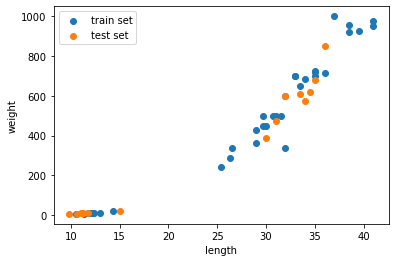

score:  1.0
predict:  [0 0 1 0 1 1 1 0 1 1 0 1 1 0]
test_target:  [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [28]:
# 소스 코드
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 
475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 
575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 
920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 
8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
# 길이와 무게를 합쳐 2차원 리스트 생성
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0]*14 # target 값 생성

'''
Numpy 활용
'''
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
np.random.seed(42)
index_list = np.arange(49) # 0~48까지 배열 생성
np.random.shuffle(index_list) # 무작위로 섞음
'''
랜덤하게 섞인 index_list의 값을 이용 input_arr에서 훈련용 데이터를 가져옴
(올바른 훈련 데이터를 얻기 위함)
'''

# 훈련 세트 생성
train_input = input_arr[index_list[:35]]
train_target = target_arr[index_list[:35]]
# 테스트 세트 생성
test_input = input_arr[index_list[35:]]
test_target = target_arr[index_list[35:]]
import matplotlib.pyplot as plt
# [:, 0]: 모든 행에서 0번째 length, [:, 1]: 모든 행에서 1번째 weight
plt.scatter(train_input[:, 0], train_input[:, 1], label='train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test set')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()
# KNeighborClassifier 객체 생성 및 모델 훈현
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
print("score: ", kn.score(test_input, test_target))
print("predict: ", kn.predict(test_input))
print("test_target: ", test_target) # predict 결과값과 비교를 위해 출력

### 문제점 발생
- 2-1 머신러닝 프로그램의 문제점 발생</br>
    • 길이 25cm, 무게 150g인 도미(1)를 빙어(0)로 판단함.

==>

- 샘플 데이터의 두 특성(길이, 무게)의 스케일이 다르기 때문</br>
    - 스케일을 조정해야 됨: 표준점수로 변환해야 됨</br>
- 표준 점수: 평균과의 거리

predict(길이 25cm, 무게 150kg):  [0]


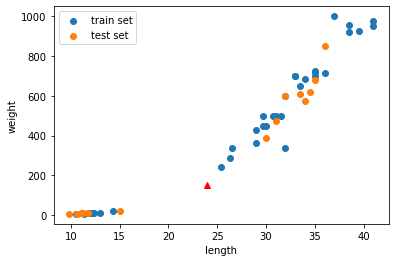

In [33]:
print("predict(길이 25cm, 무게 150kg): ", kn.predict([[25, 150.0]]))

plt.scatter(train_input[:, 0], train_input[:, 1], label='train set')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test set')
plt.scatter(24, 150.0, marker='^', color = "red")
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

### Numpy를 활용한 데이터 전처리 #1
- column_stack()
    - Numpy 제공 함수: 리스트를 일렬로 세운 다음 차례대로 연결
    - Python에서 제공하는 zip()함수와 동일한 기능

In [36]:
#	column_stack((list1,	list2)):	튜플 형태로 전달
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


- ones(n),	zeros(n)
    - 개수(n)만큼 각각 1과 0으로 채운 배열을 생성함

In [37]:
print(np.ones(35))
print(np.zeros(14))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- concatenate((a1,	a2,	...))
    - a1,	a2	배열을 서로 연결함 (a1 배열 다음에 a2 배열 연결)
    - 연결할 배열을 튜플로 전달

In [38]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기 #1
- train_test_split() 함수 원형
    - sklearn.model_selection.train_test_split(*arrays, test_size=None, train_
size=None, random_state=None, shuffle=True, stratify=None)

    - 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나눔
    - 총 4개의 배열이 반환됨

    - 함수 파라미터 내용
        - test_size:	0.0 ~ 1.0	사이
            - None:	자동으로 25% 비율로 테스트 세트 생성
        - train_size:	0.0	~	1.0	사이
            - None: 자동으로 75% 비율로 훈련 세트 생성
        - random_state:	랜덤 시드 설정
        - stratify:	target 데이터를 전달하면, 클래스 비율(0, 1)에 맞게 데이터
        를 나눔

In [75]:
# • 4개의 데이터 셋을 리턴
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print('train_input.shape: ', train_input.shape,
'test_input.shape', test_input.shape)

print('train_target: ', train_target)
print('test_target: ', test_target)

train_input.shape:  (36, 2) test_input.shape (13, 2)
train_target:  [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
test_target:  [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 가장 가까운 이웃 찾기

In [46]:
#  k-최근접 이웃 모델 적용
# • train_test_split()함수로 나눈 데이터 사용

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print("score: ", kn.score(test_input, test_target))

#	25cm,	150g의 생선 분류 (수상한 도미)
print(kn.predict([[25,	150]])) # 빙어(0)로 분류

score:  1.0
[0.]


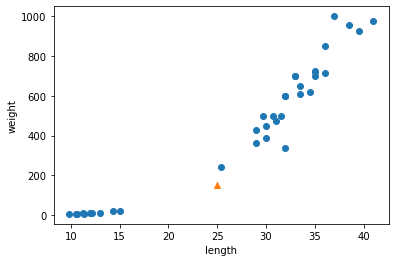

In [48]:
#  길이 25cm, 무게 150g의 생선을 산점도로 표시
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25,	150,	marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [50]:
#  가장 가까운 이웃과의 거리 계산
# • kneighbors(): n_neighbors(default값 5)개의 이웃을 찾음

distances, indexes = kn.kneighbors([[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


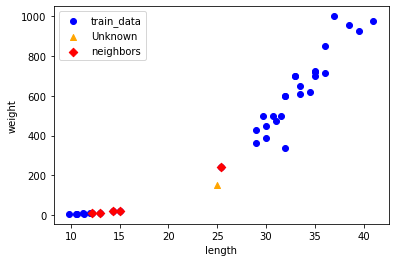

In [52]:
#  가장 가까운 이웃 5개를 산점도로 표시
import	matplotlib.pyplot as	plt
plt.scatter(train_input[:,	0],	train_input[:,	1],	label='train_data',	color='b')
plt.scatter(25,	150,	marker='^',	color='orange',	label='Unknown')
plt.scatter(train_input[indexes,	0],	train_input[indexes,	1],
marker='D',	label='neighbors',	color='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [54]:
print("neighbors:	",	train_input[indexes])
print("target:	",	train_target[indexes])

# target:	 [[1. 0. 0. 0. 0.]] => (25cm, 150g) 생선의 이웃 4개는 빙어

neighbors:	 [[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
target:	 [[1. 0. 0. 0. 0.]]


### Scale을 동일하게 수정
    - 두 특성(길이, 무게)의 scale이 다름  
    - xlim(), ylim()함수: x, y축의 범위를 지정

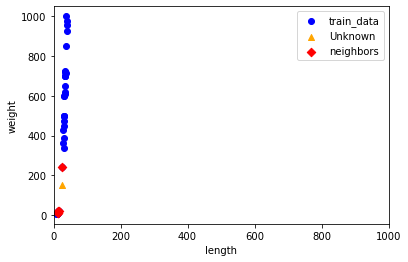

In [58]:
plt.scatter(train_input[:,	0],	train_input[:,	1],	
label='train_data',	color='b')
plt.scatter(25,	150,	marker='^'
,	color='orange',	label='Unknown')
plt.scatter(train_input[indexes,	0],	train_input[indexes,	1],
marker='D',	label='neighbors',	color='r')
plt.xlim((0,	1000)) #	x축의 눈금 간격을 y축과 동일하게 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 생선의 무게에 따라 분류에 큰 영향을 미침

### 데이터 전처리 (Data Preprocessing)
- 데이터 전처리
    - 특성값을 일정한 기준으로 맞춤
    - 표준 점수 (Standard	Score, Z 점수)
        - 각 특성(길이, 무게)의 값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를
        나타냄

In [59]:
#  평균 및 표준편차 계산
# • 브로드 캐스팅
# – 행(row)이나 열(column)의 모든 데이터에 대해 한 번에 연산을 수행

mean	=	np.mean(train_input,	axis=0)	#	axes=0:	각 컬럼의 평균 계산
std	=	np.std(train_input,	axis=0)
print(mean,	std)

# [ 27.29722222 454.09722222] [  9.98244253 323.29893931]
# [length 평균 weight 평균] [length 표준편차 weight 표준편차]


[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [62]:
#  표준 점수(Z값) 계산
train_scaled =	(train_input - mean)	/	std		#	표준 점수로 변환한 데이터
print(train_scaled[:5])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]]


## 전처리 데이터로 모델 훈련

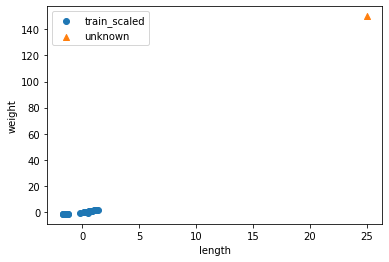

In [64]:
#  표준 점수로 변환한 훈련 데이터 분포 확인
# • train_scaled 데이터와 샘플 데이터(25, 150) 비교

plt.scatter(train_scaled[:,	0],	train_scaled[:,	1],	label='train_scaled')
plt.scatter(25,	150,	marker='^'
,	label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 하지만 정작 샘플 데이터(25, 150)은 표준 점수가 아님

표준 점수 sample [-0.23012627 -0.94060693]


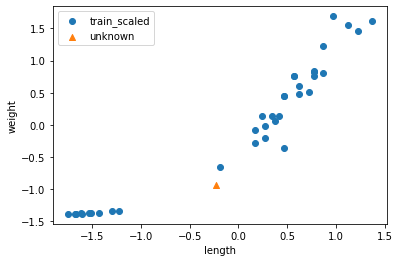

In [65]:
# 샘플 데이터를 표준 점수로 변환
new = ([25, 150] - mean) / std
print("표준 점수 sample",	new)

plt.scatter(train_scaled[:,	0],	train_scaled[:,	1],	label='train_scaled')
plt.scatter(new[0],	new[1],	marker='^'
,	label='unknown')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [66]:
# 표준 점수로 변환한 훈련 데이터로 k-최근접 이웃 모델 훈련

#	표준점수로 변환한 훈련 데이터로 k-NN	훈련
kn.fit(train_scaled,	train_target)
#	테스트 세트를 표준 점수로 변환
test_scaled =	(test_input - mean)	/	std
print(kn.score(test_scaled,	test_target))
#	표준 점수로 변환된 샘플 데이터를 가지고 예측
print(kn.predict([new]))

# 결과 – 길이가 25cm, 무게가 150g인 생선을 도미로 인식함

1.0
[1.]


### 최종 이웃 찾기 및 산점도

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


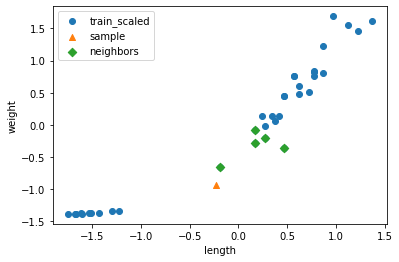

In [72]:
#	표준 점수로 변경된 샘플 데이터의 이웃 찾기 및 산점도
distances, indexes = kn.kneighbors([new])
print(distances)

plt.scatter(train_scaled[:,	0],	train_scaled[:,	1],	label='train_scaled')
plt.scatter(new[0],	new[1],	marker='^'
,	label='sample')
plt.scatter(train_scaled[indexes,	0],	train_scaled[indexes,	1],
marker='D',	label='neighbors')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# 샘플 데이터(25cm, 150g)에 가장 가까운 이웃들은 도미